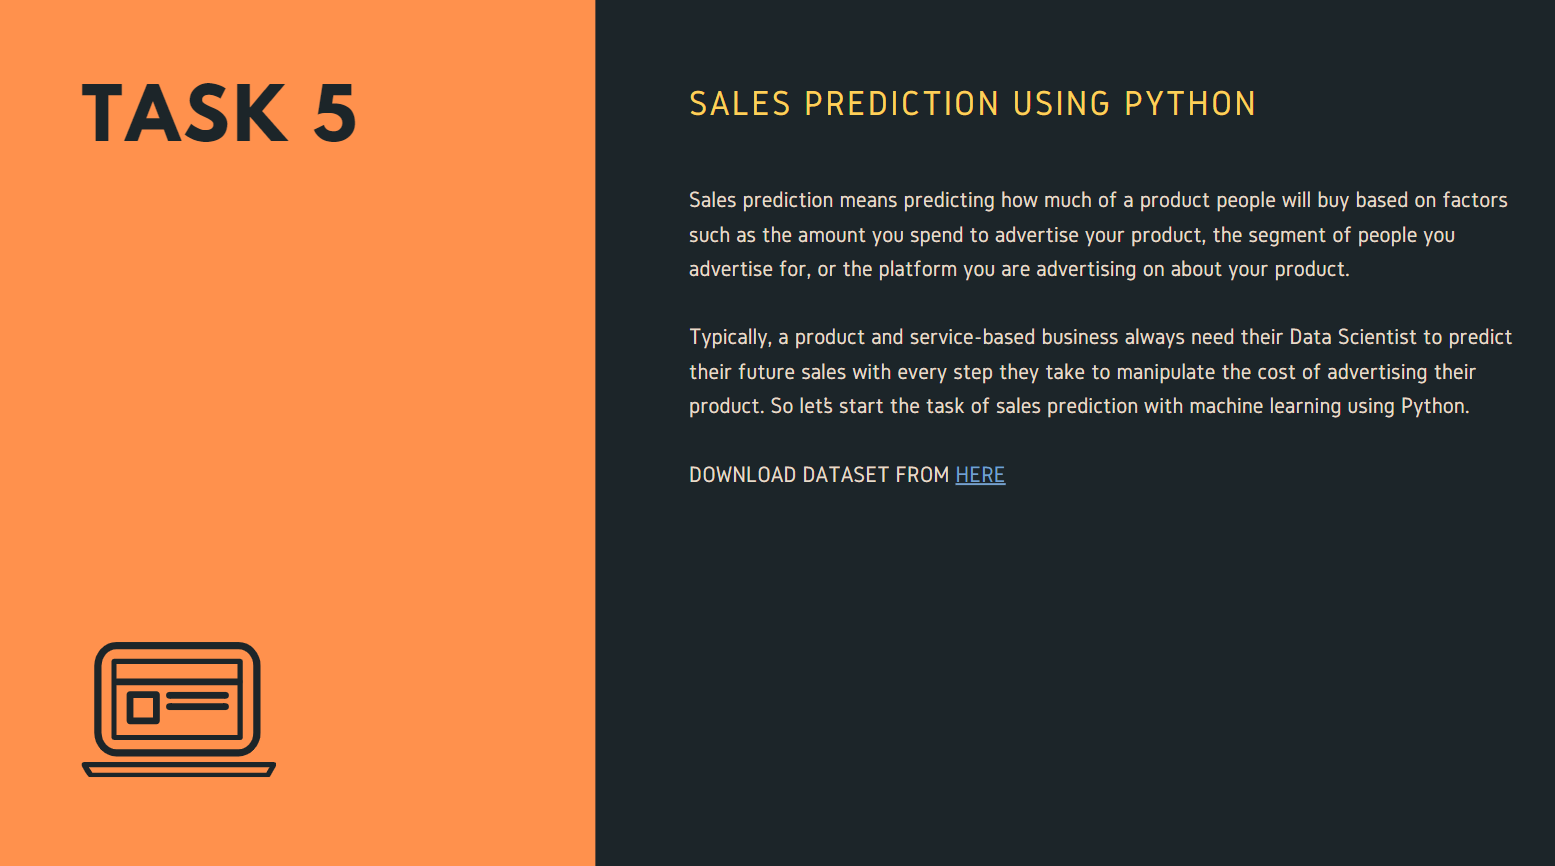

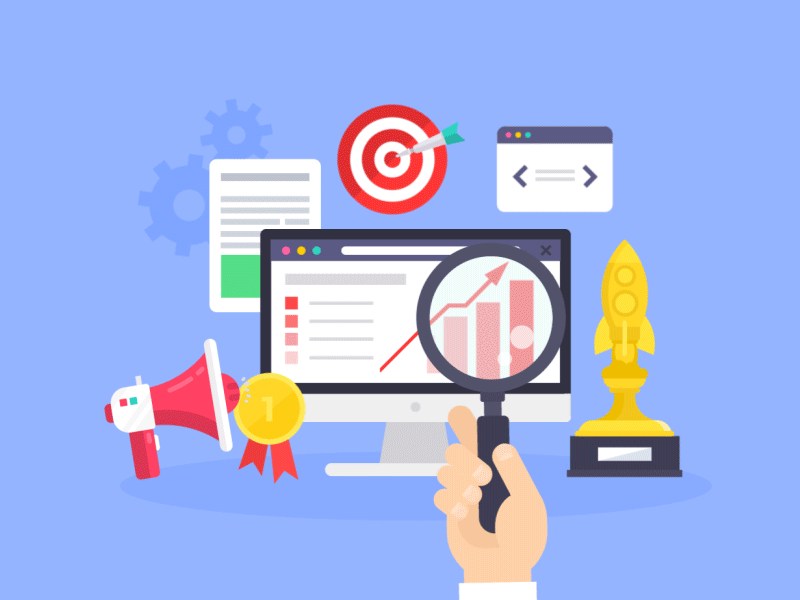

## Importing Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [32]:
import warnings
warnings.filterwarnings('ignore')

## Importing from dataset

In [33]:
df=pd.read_csv('Advertising.csv')
df

Unnamed: 0     TV  Radio  Newspaper  Sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]

In [34]:
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [35]:
df.shape

(200, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [37]:
df.describe()

Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000

In [38]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [39]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [40]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [41]:
df.duplicated().sum()

0

## Data Visualization & Plotting

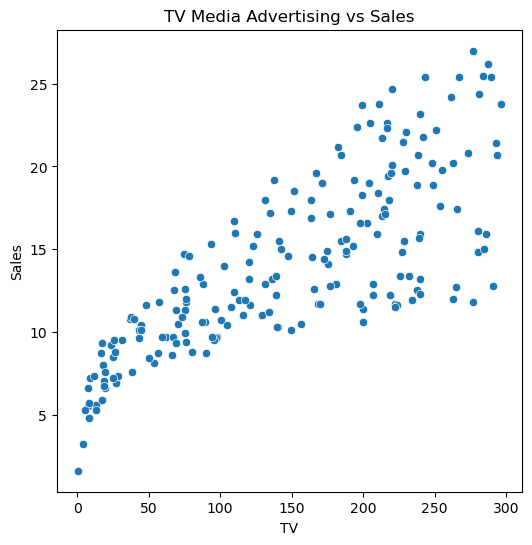

In [42]:
plt.figure(figsize=(6,6))
plt.title('TV Media Advertising vs Sales')
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

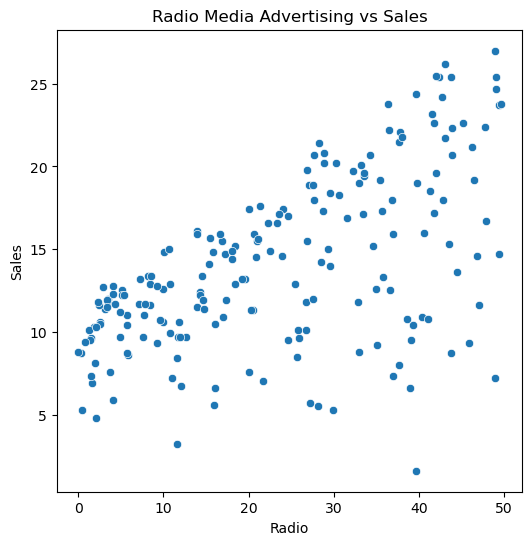

In [43]:
plt.figure(figsize=(6,6))
plt.title('Radio Media Advertising vs Sales')
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

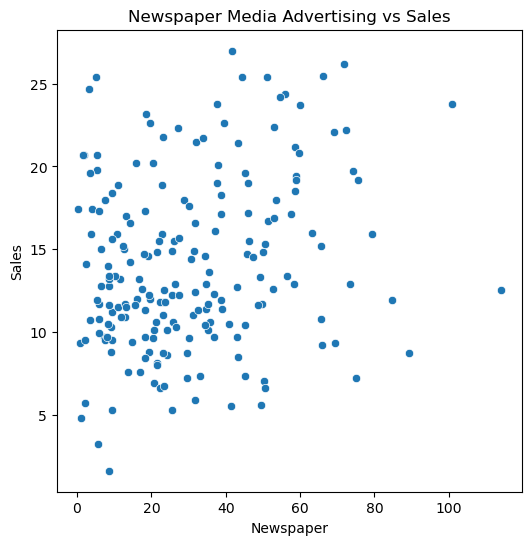

In [44]:
plt.figure(figsize=(6,6))
plt.title('Newspaper Media Advertising vs Sales')
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

## Correlation Matrix

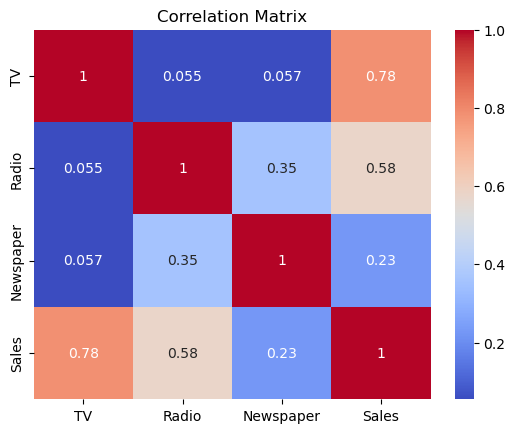

In [45]:
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## Building the Sales Forecasting model

In [47]:
X = df.drop('Sales',axis=1)
y= df['Sales']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (160, 3)
Test set of features:  (40, 3)
Target for train:  (160,)
Target for test:  (40,)


# Model selection & Training

## Linear Regression

In [48]:
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)
y_pred=linear_reg.predict(X_test)

## Metrics of Linear Regression

In [49]:
print('Mean squared error:',mean_squared_error(y_test,y_pred))

Mean squared error: 3.1740973539761015


In [51]:
print("R2 Score:",r2_score(y_test,y_pred)*100)

R2 Score: 89.94380241009121


## Decision tree

In [53]:
model=DecisionTreeRegressor()

In [54]:
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

## Metrics of Decision tree model

In [55]:
print('Mean squared error:',mean_squared_error(y_test,y_pred))

Mean squared error: 2.39675


In [56]:
print("R2 Score:",r2_score(y_test,y_pred)*100)

R2 Score: 92.40659977129505


Decision tree model has more r2_score compared to linear regression model.Hence,Sales forecasting is more effective by using Decision tree model